In [1]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
adata = sc.read_10x_h5(
    filename="/home/ubuntu/data/spatial/xeniumDemo/cell_feature_matrix.h5"   
)

In [6]:
adata.obsm_keys

<bound method AnnData.obsm_keys of AnnData object with n_obs × n_vars = 36602 × 248
    var: 'gene_ids', 'feature_types', 'genome'>

In [21]:
df = pd.read_csv(
    "/home/ubuntu/data/spatial/xeniumDemo/cells.csv"
)
df

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area
0,1,1898.814917,2540.963147,384,0,0,385,305.211094,70.714687
1,2,1895.304724,2532.626880,146,0,0,146,176.606094,6.412187
2,3,2368.073230,2534.409265,81,0,0,81,263.938281,32.783437
3,4,1903.726282,2560.009912,314,0,0,315,427.810313,68.185938
4,5,1917.481299,2543.131934,639,0,0,640,424.604219,102.956250
...,...,...,...,...,...,...,...,...,...
36597,36598,3341.792432,3347.323865,352,0,0,352,466.960781,67.373125
36598,36599,3370.737878,3357.877063,412,1,0,413,576.193750,6.863750
36599,36600,3333.378137,3360.594324,161,0,0,161,398.323281,13.230781
36600,36601,3322.742554,3312.781409,387,0,0,387,510.762344,21.313750


In [8]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [9]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [25]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,total_counts,cell_area,nucleus_area,n_genes_by_counts,log1p_n_genes_by_counts,log1p_total_counts,pct_counts_in_top_10_genes,pct_counts_in_top_20_genes,pct_counts_in_top_50_genes,pct_counts_in_top_150_genes,n_counts,leiden
1,1,1898.814917,2540.963147,384,0,0,384.0,305.211094,70.714687,96,4.574711,5.953243,37.760417,55.729167,85.677083,100.0,384.0,8
2,2,1895.304724,2532.626880,146,0,0,146.0,176.606094,6.412187,64,4.174387,4.990433,42.465753,62.328767,90.410959,100.0,146.0,8
3,3,2368.073230,2534.409265,81,0,0,81.0,263.938281,32.783437,48,3.891820,4.406719,44.444444,65.432099,100.000000,100.0,81.0,0
4,4,1903.726282,2560.009912,314,0,0,314.0,427.810313,68.185938,94,4.553877,5.752573,43.312102,59.235669,84.076433,100.0,314.0,7
5,5,1917.481299,2543.131934,639,0,0,639.0,424.604219,102.956250,97,4.584967,6.461468,43.974961,63.693271,89.671362,100.0,639.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36598,36598,3341.792432,3347.323865,352,0,0,352.0,466.960781,67.373125,91,4.521789,5.866468,43.181818,62.500000,88.352273,100.0,352.0,16
36599,36599,3370.737878,3357.877063,412,1,0,412.0,576.193750,6.863750,84,4.442651,6.023448,46.359223,66.504854,91.019417,100.0,412.0,16
36600,36600,3333.378137,3360.594324,161,0,0,161.0,398.323281,13.230781,57,4.060443,5.087596,56.521739,74.534161,95.652174,100.0,161.0,10
36601,36601,3322.742554,3312.781409,387,0,0,387.0,510.762344,21.313750,95,4.564348,5.961005,43.669251,63.049096,86.821705,100.0,387.0,16


In [11]:
# calculate qc metrics
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [12]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.03481324901652295
Negative decoding count % : 0.004175817651679654


<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

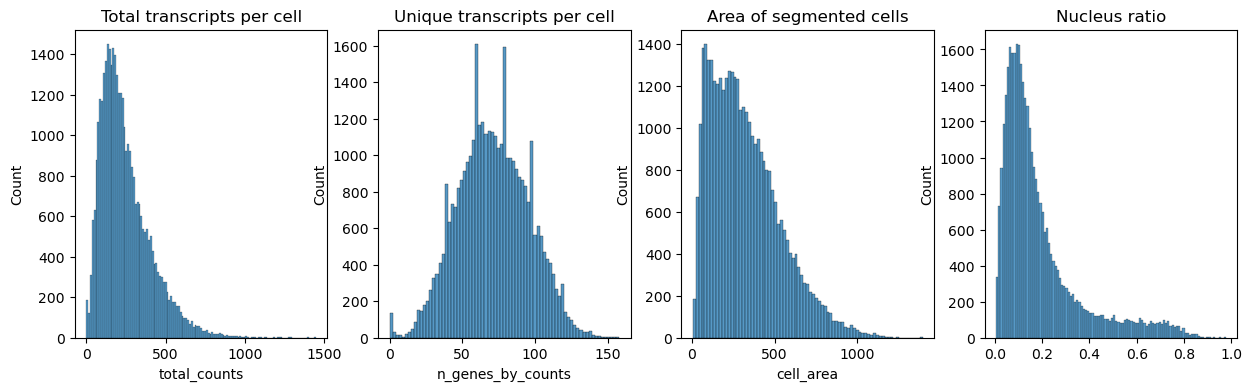

In [10]:
# plot qc metrics
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [13]:
# qc on metrics
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [14]:
# preprocess pipeline
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/home/ubuntu/miniforge3/envs/sc/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3212/4193936636.py:7: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


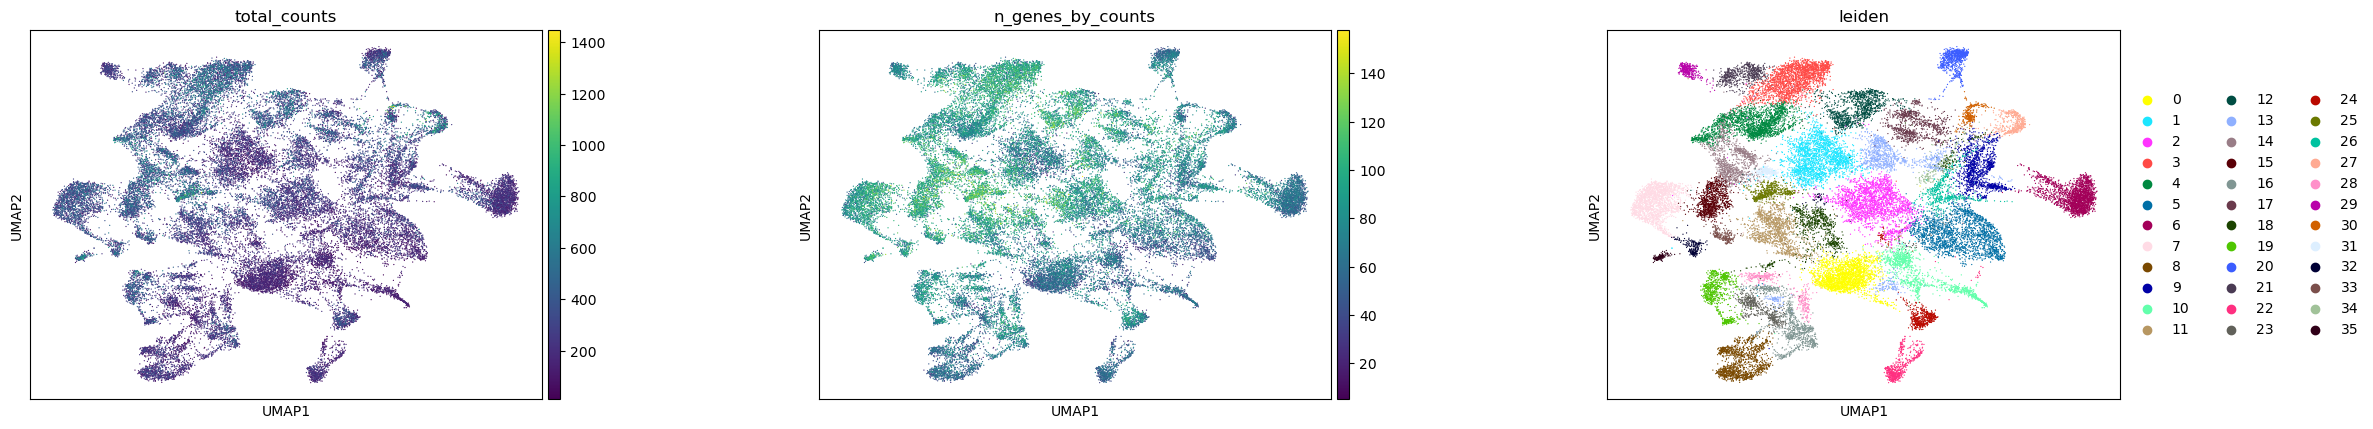

In [13]:
# Plot UMAP
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

In [29]:
# cluster with lower resolution
sc.tl.leiden(adata=adata, resolution= 0.5, key_added= "l2")

/home/ubuntu/miniforge3/envs/sc/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


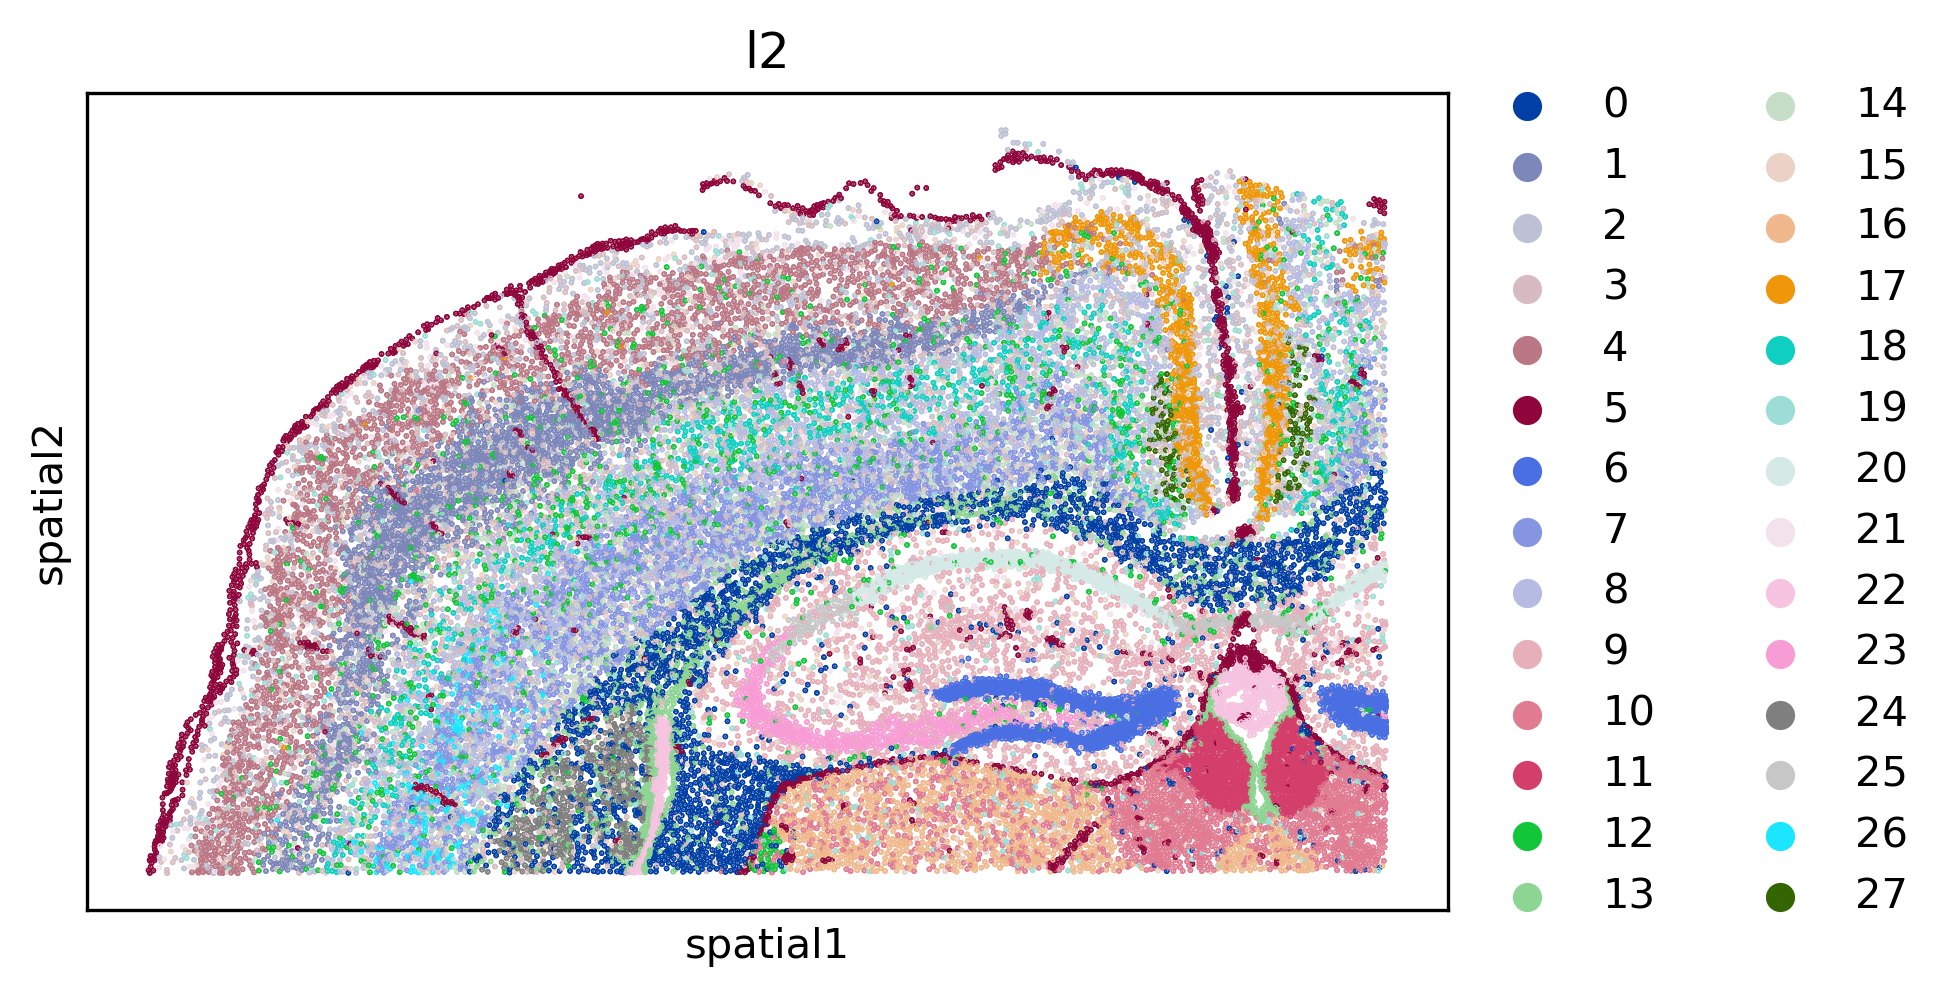

In [31]:
# Plot clusters on spatial 
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    size = 0.5,
    color=[
        "l2",
    ], 
    dpi = 300
)

In [3]:
sq.im.process(xeimg,layer="image", method="gray", chunks=1000)


ValueError: Expected channel dimension to be `3`, found `11`.